# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

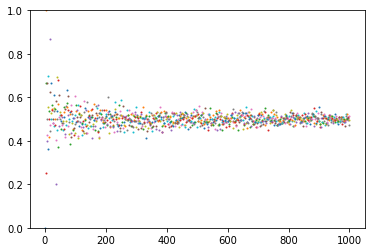

In [5]:
import numpy as np
from matplotlib import pyplot as plt


def prob_e(n):
    omega = ['H', 'T']
    tosses = list(np.random.choice(omega, n))
    return tosses.count('H')/float(n)


for n in range(1, 1000):
    prob = prob_e(n)
    plt.scatter(n, prob, 1)
plt.ylim(0, 1) 
plt.show()

# 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [98]:
import numpy as np
from itertools import product


def prob_t(f, x_max):
    if not (1 <= x_max <= max(f)):
        return 0
    omega = list(product(*[list(range(1, n + 1)) for n in f]))
    return len(list(filter(lambda t: max(t) == x_max, omega)))/float(len(omega))
        

def prob_e(f, x_max):
    if not (1 <= x_max <= max(f)):
        return 0
    tests = 10000
    omega = list(product(*[list(range(1, n + 1)) for n in f]))
    counter = 0
    for i in range(tests):
        toss = omega[np.random.randint(0, len(omega))]
        if max(toss) == x_max:
            counter += 1
    return counter/float(tests)


def test(f, x_max):
    print("For f = {}, x_max = {}:\n \
       Empirical probability is {}\n \
       Theoretical probability is {}\n".format(f, x_max, prob_e(f, x_max), prob_t(f, x_max)))

    
test([2, 5, 8], 8)
test([3, 4], 2)
test([2, 5, 7, 3], 3)

For f = [2, 5, 8], x_max = 8:
        Empirical probability is 0.1264
        Theoretical probability is 0.125

For f = [3, 4], x_max = 2:
        Empirical probability is 0.2529
        Theoretical probability is 0.25

For f = [2, 5, 7, 3], x_max = 3:
        Empirical probability is 0.1808
        Theoretical probability is 0.18095238095238095



## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [99]:
import numpy as np
from itertools import product


def prob_t(f, s):
    if not (min(f) <= s <= sum(f)):
        return 0
    omega = list(product(*[list(range(1, n + 1)) for n in f]))
    return len(list(filter(lambda t: sum(t) == s, omega)))/float(len(omega))
        

def prob_e(f, s):
    if not (min(f) <= s <= sum(f)):
        return 0
    tests = 10000
    omega = list(product(*[list(range(1, n + 1)) for n in f]))
    counter = 0
    for i in range(tests):
        toss = omega[np.random.randint(0, len(omega))]
        if sum(toss) == s:
            counter += 1
    return counter/float(tests)


def test(f, s):
    print("For f = {}, s = {}:\n \
       Empirical probability is {}\n \
       Theoretical probability is {}\n".format(f, s, prob_e(f, s), prob_t(f, s)))

    
test([3, 4, 5], 13)
test([2, 2], 3)
test([3, 4, 5], 7)

For f = [3, 4, 5], s = 13:
        Empirical probability is 0
        Theoretical probability is 0

For f = [2, 2], s = 3:
        Empirical probability is 0.4997
        Theoretical probability is 0.5

For f = [3, 4, 5], s = 7:
        Empirical probability is 0.1798
        Theoretical probability is 0.18333333333333332

